In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import logging
snscolors = sns.color_palette("colorblind")
from chainconsumer import Chain, ChainConsumer, Truth
import cosmicfishpie.analysis.fishconsumer as fco
from cosmicfishpie.analysis import fisher_matrix as cf
from cosmicfishpie.analysis import fisher_plot_analysis as cfa
from cosmicfishpie.likelihood.sampler import load_chain_metadata

# Table of Contents

[Obtain parameters from Fisher Matrix](#obtain-parameters-from-fisher-matrix)

[Load Nautilus chains](#load-nautilus-chains)

[Plot Nautilus chains vs. Fisher Matrix](#plot-nautilus-chains-vs-fisher-matrix)

[Plot and compare all](#plot-and-compare-all)

# Load Nautilus chains

In [2]:
chain_dir = "../chains/chains_desi_w0wafid"
chain_file, fid_params, _, param_labels = load_chain_metadata(
    chain_dir,
    ##label_overrides={"b1": r"$b_0$"}  # optional
)
print(fid_params)
print(param_labels)
photo_chain_w0wa = fco.load_Nautilus_chains_from_txt(filename=chain_file, param_cols=fid_params)

{'Omegam': 0.3191, 'Omegab': 0.049795, 'h': 0.6674, 'ns': 0.96605, 'sigma8': 0.81, 'AIA': 1.72, 'etaIA': -0.41, 'b1': 1.0997727037892875, 'b2': 1.220245876862528, 'b3': 1.2723993083933989, 'b4': 1.316624471897739, 'b5': 1.35812370570578, 'b6': 1.3998214171814918, 'b7': 1.4446452851824907, 'b8': 1.4964959071110084, 'b9': 1.5652475842498528, 'b10': 1.7429859437184225}
{'Omegam': '$\\Omega_{m}$', 'Omegab': '$\\Omega_{b}$', 'h': '$h$', 'ns': '$n_{\\rm s}$', 'sigma8': '$\\sigma_8$', 'AIA': '$A_{\\rm IA}$', 'etaIA': '$\\eta_{\\rm IA}$', 'b1': '$b_{1}$', 'b2': '$b_{2}$', 'b3': '$b_{3}$', 'b4': '$b_{4}$', 'b5': '$b_{5}$', 'b6': '$b_{6}$', 'b7': '$b_{7}$', 'b8': '$b_{8}$', 'b9': '$b_{9}$', 'b10': '$b_{10}$'}


In [3]:
chain_dir = "../chains/chains_lcdm_fid"
chain_file, fid_params_lcdm, _, param_labels = load_chain_metadata(
    chain_dir,
    ##label_overrides={"b1": r"$b_0$"}  # optional
)
print(fid_params_lcdm)
print(param_labels)
photo_chain_lcdm = fco.load_Nautilus_chains_from_txt(filename=chain_file, param_cols=fid_params_lcdm)

{'Omegam': 0.3191, 'Omegab': 0.049795, 'h': 0.6674, 'ns': 0.96605, 'sigma8': 0.81, 'AIA': 1.72, 'etaIA': -0.41, 'b1': 1.0997727037892875, 'b2': 1.220245876862528, 'b3': 1.2723993083933989, 'b4': 1.316624471897739, 'b5': 1.35812370570578, 'b6': 1.3998214171814918, 'b7': 1.4446452851824907, 'b8': 1.4964959071110084, 'b9': 1.5652475842498528, 'b10': 1.7429859437184225}
{'Omegam': '$\\Omega_{m}$', 'Omegab': '$\\Omega_{b}$', 'h': '$h$', 'ns': '$n_{\\rm s}$', 'sigma8': '$\\sigma_8$', 'AIA': '$A_{\\rm IA}$', 'etaIA': '$\\eta_{\\rm IA}$', 'b1': '$b_{1}$', 'b2': '$b_{2}$', 'b3': '$b_{3}$', 'b4': '$b_{4}$', 'b5': '$b_{5}$', 'b6': '$b_{6}$', 'b7': '$b_{7}$', 'b8': '$b_{8}$', 'b9': '$b_{9}$', 'b10': '$b_{10}$'}


In [4]:
chain_dir = "../chains/chains_lcdm_highH0_fid"
chain_file, fid_params_lcdm_highH0, _, param_labels = load_chain_metadata(
    chain_dir,
    ##label_overrides={"b1": r"$b_0$"}  # optional
)
print(fid_params_lcdm_highH0)
print(param_labels)
photo_chain_lcdm_highH0 = fco.load_Nautilus_chains_from_txt(filename=chain_file, param_cols=fid_params_lcdm_highH0)

{'Omegam': 0.3191, 'Omegab': 0.049795, 'h': 0.72, 'ns': 0.96605, 'sigma8': 0.81, 'AIA': 1.72, 'etaIA': -0.41, 'b1': 1.0997727037892875, 'b2': 1.220245876862528, 'b3': 1.2723993083933989, 'b4': 1.316624471897739, 'b5': 1.35812370570578, 'b6': 1.3998214171814918, 'b7': 1.4446452851824907, 'b8': 1.4964959071110084, 'b9': 1.5652475842498528, 'b10': 1.7429859437184225}
{'Omegam': '$\\Omega_{m}$', 'Omegab': '$\\Omega_{b}$', 'h': '$h$', 'ns': '$n_{\\rm s}$', 'sigma8': '$\\sigma_8$', 'AIA': '$A_{\\rm IA}$', 'etaIA': '$\\eta_{\\rm IA}$', 'b1': '$b_{1}$', 'b2': '$b_{2}$', 'b3': '$b_{3}$', 'b4': '$b_{4}$', 'b5': '$b_{5}$', 'b6': '$b_{6}$', 'b7': '$b_{7}$', 'b8': '$b_{8}$', 'b9': '$b_{9}$', 'b10': '$b_{10}$'}


# Plot Nautilus chains vs. Fisher Matrix

Plot saved to: cosmicjellyfish-Euclid_3x2ph.png


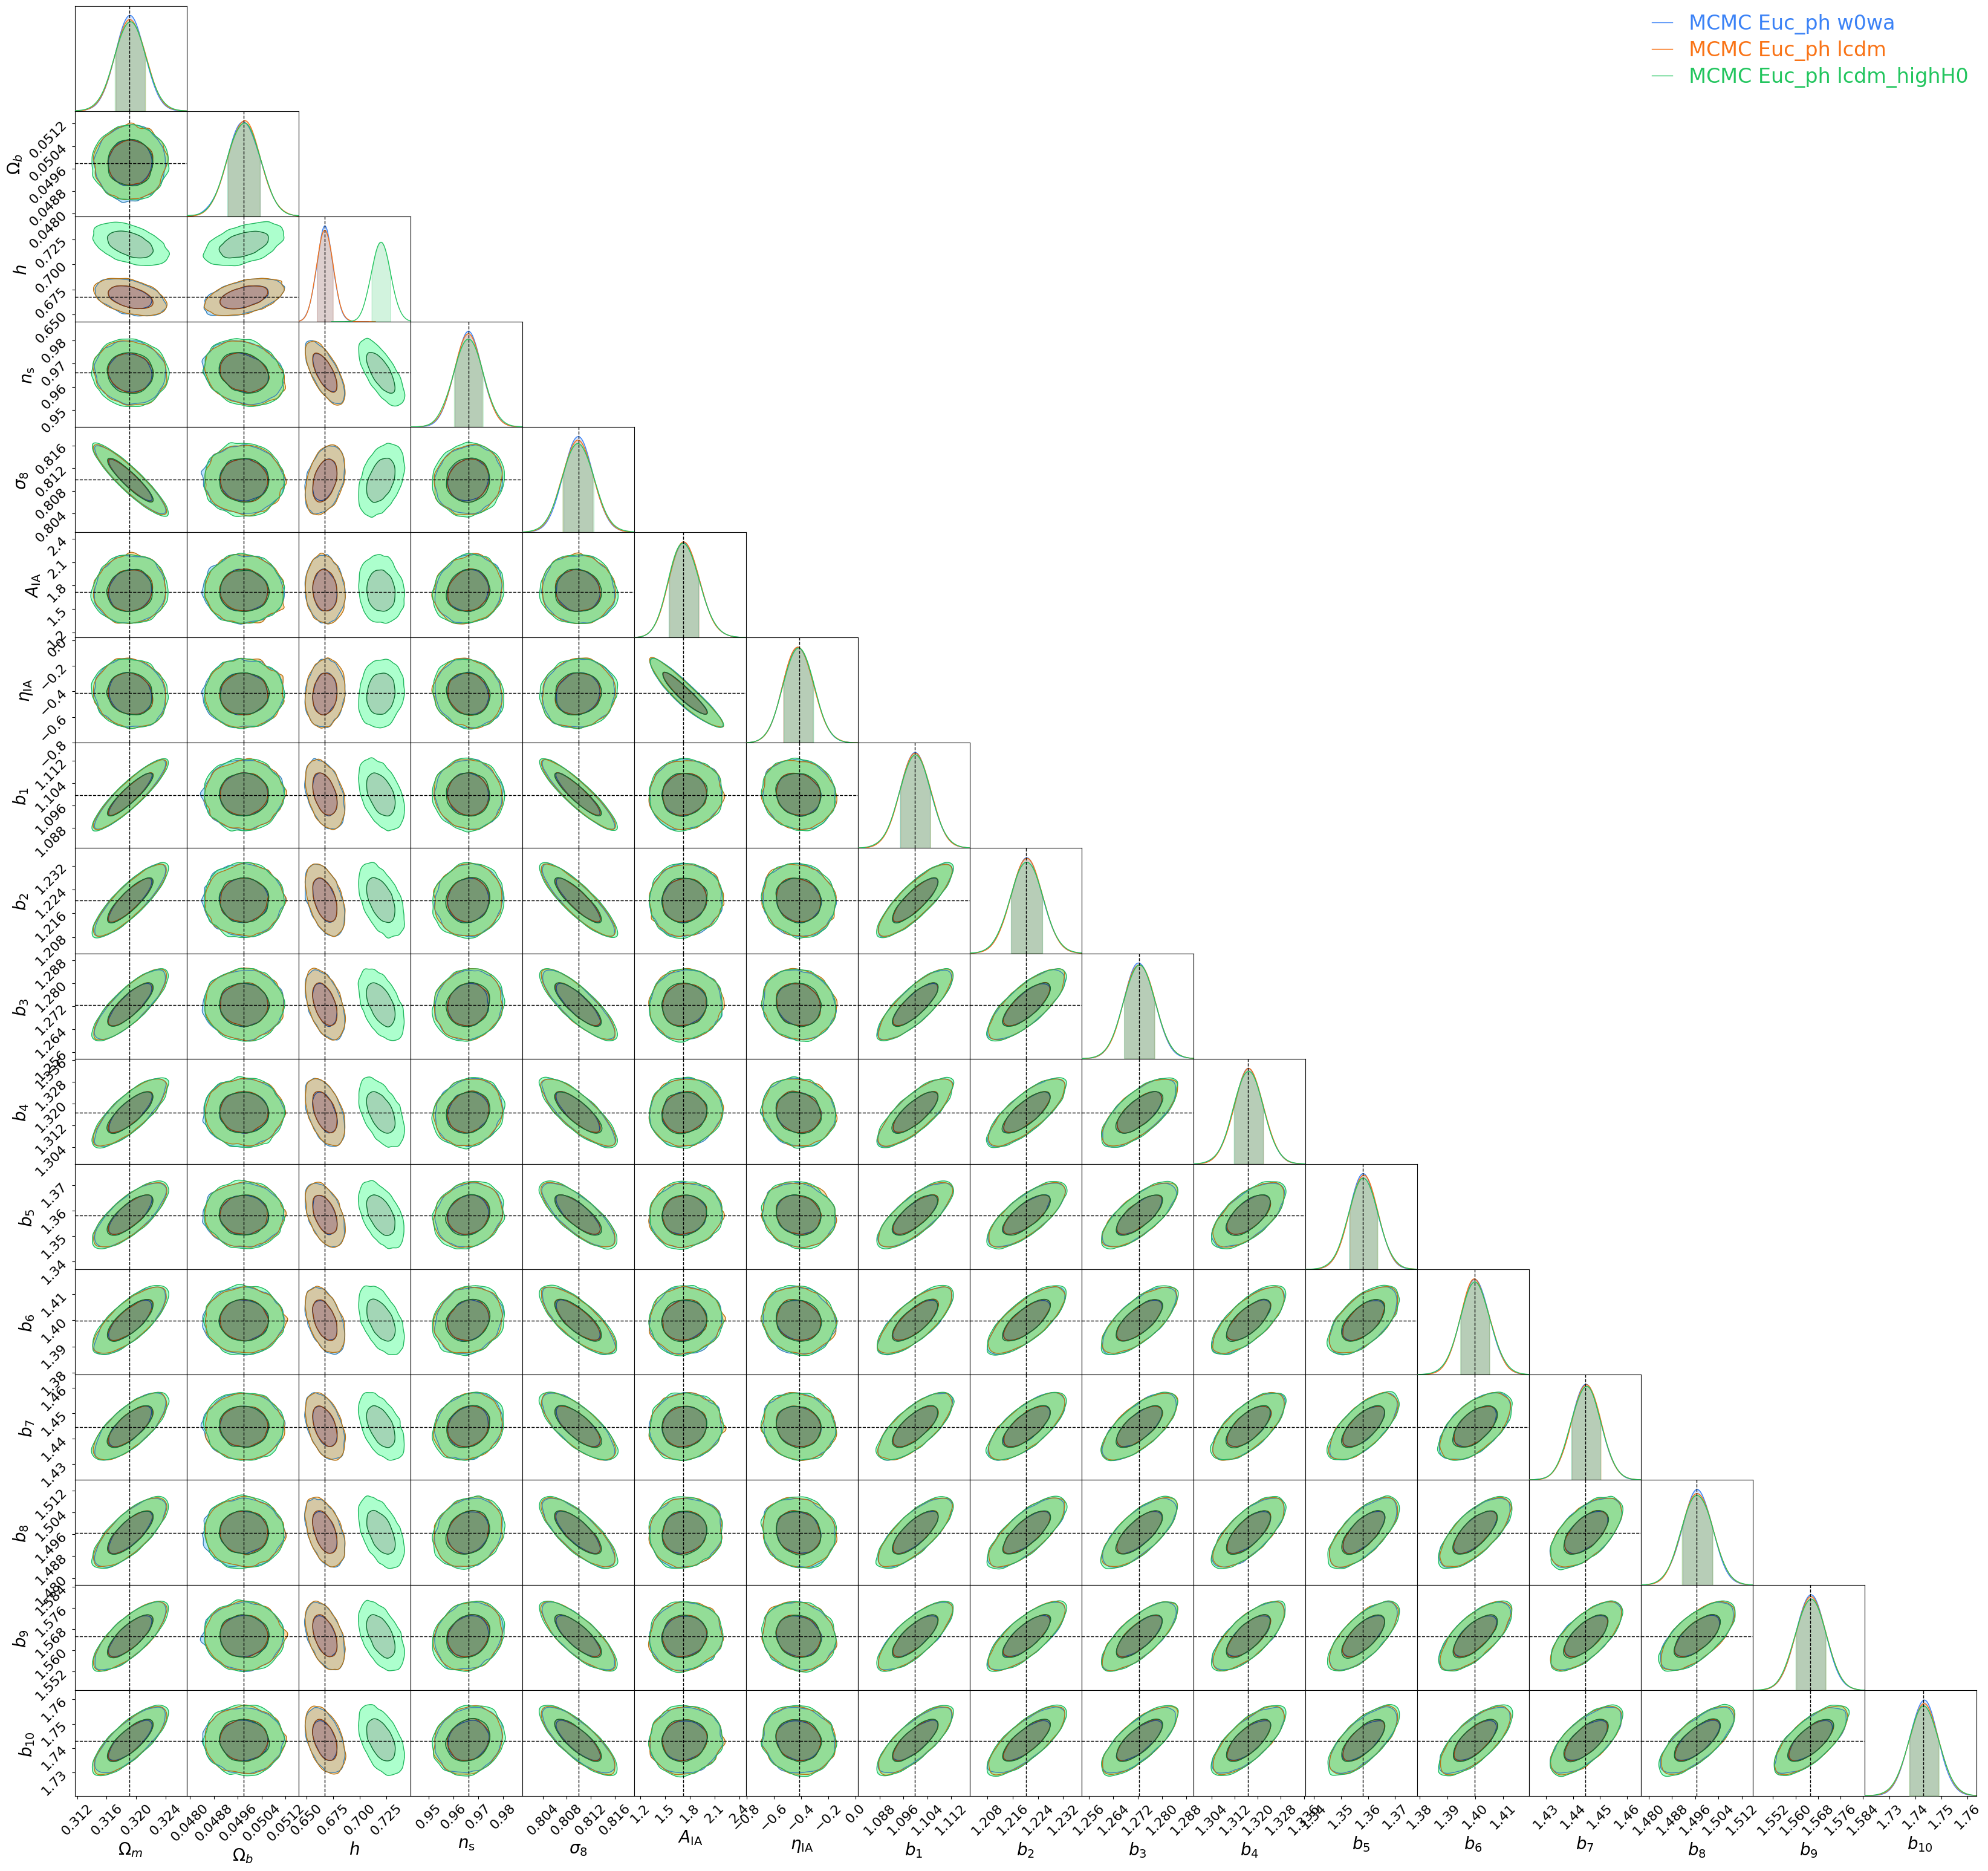

In [6]:
contour_plot_chains_fisher = fco.make_triangle_plot(
    chains=[
        photo_chain_w0wa,
        photo_chain_lcdm,
        photo_chain_lcdm_highH0
        ],
    colors=[
        'blue',
        'orange',
        'green'
        ],
    chain_labels=[
        'MCMC Euc_ph w0wa',
        'MCMC Euc_ph lcdm',
        'MCMC Euc_ph lcdm_highH0'
        ],
    #fisher_labels=[
    #    'Fisher Euc-ISTF-simple-GCph'
    #    ],
    truth_values=fid_params,
    params=list(fid_params.keys()),
    smooth=10,
    bins=15,
    param_labels=param_labels,
    label_font_size=20,
    tick_font_size=16,
    legend_kwargs={"fontsize": 24},
    savefile='cosmicjellyfish-Euclid_3x2ph.png'
)
#euclid_photo_fig.show()

Plot saved to: cosmicjellyfish-Euclid_3x2ph_summary.png


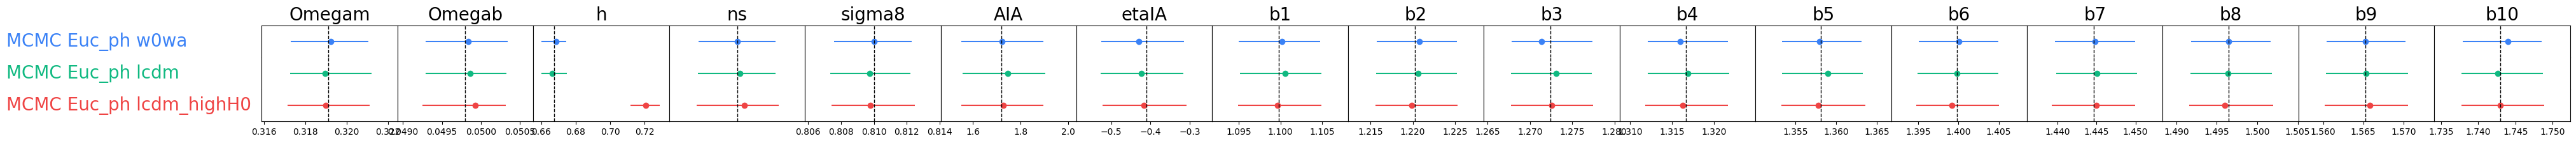

In [8]:
cc, fig_summary = fco.plot_chain_summary(
                                     chains=[
                                        photo_chain_w0wa,
                                        photo_chain_lcdm,
                                        photo_chain_lcdm_highH0
                                        ],
                           chain_names=[
                              'MCMC Euc_ph w0wa',
                              'MCMC Euc_ph lcdm',
                              'MCMC Euc_ph lcdm_highH0'
                              ],
                           truth_values=fid_params_lcdm,
                                     output_file="cosmicjellyfish-Euclid_3x2ph_summary.png",
                                     blind_params=['ns'],
                                     plot_config_kwargs={"label_font_size": 20, 
                                                         "tick_font_size": 20}) 

In [9]:
#%%latex
print(cc.analysis.get_latex_table(transpose=True))

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccc}
        \hline
		Parameter & MCMC Euc_ph w0wa & MCMC Euc_ph lcdm & MCMC Euc_ph lcdm_highH0 \\ 
		\hline
		Omegam & $\left( 319.2^{+1.8}_{-1.9} \right) \times 10^{-3}$ & $\left( 318.9^{+2.2}_{-1.7} \right) \times 10^{-3}$ & $\left( 319.0^{+2.1}_{-1.9} \right) \times 10^{-3}$ \\ 
		Omegab & $\left( 498.4^{+5.0}_{-5.5} \right) \times 10^{-4}$ & $\left( 498.6^{+4.6}_{-5.7} \right) \times 10^{-4}$ & $\left( 499.2^{+3.9}_{-6.7} \right) \times 10^{-4}$ \\ 
		h & $\left( 668.5^{+6.2}_{-8.3} \right) \times 10^{-3}$ & $\left( 666.2^{+8.6}_{-6.1} \right) \times 10^{-3}$ & $\left( 720.7^{+7.9}_{-9.1} \right) \times 10^{-3}$ \\ 
		sigma8 & $\left( 810.0^{+2.3}_{-2.4} \right) \times 10^{-3}$ & $\left( 809.7^{+2.5}_{-2.4} \right) \times 10^{-3}$ & $\left( 809.8^{+2.7}_{-2.4} \right) \times 10^{-3}$ \\ 
		AIA & $1.72\pm 0.17$ & $1.75^{+0.16}_{-0.19}$ & $1.73^{+0.17}_{-0.18}$ \\ 
		etaIA & $-0.429^{+0.114